<a href="https://colab.research.google.com/github/HIDDENDEN/InverseProblemGradientBasic/blob/main/Gradient_FunctionalInverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Select which test metod to implement*
*    *Set 'controller' variable next values:*
          
*          * **=1** to implement **base** variant*
*          * **=2** to implement **trigonometry** variant*
*          * **=3** to implement **degree** variant*

In [ ]:
# controller = 1
# http://www.apmath.spbu.ru/ru/staff/abbasov_m_e/files/MO1.pdf
controller = 2

# controller = 3

*Importing different files in case of chosen controller value*

In [ ]:
if (controller == 1):
  !cp "drive/My Drive/Science_res/InverseProblem/base/At.py" .
  import At

  !cp "drive/My Drive/Science_res/InverseProblem/base/Betax.py" .
  import Betax

  !cp "drive/My Drive/Science_res/InverseProblem/base/Ht.py" .
  import Ht

  !cp "drive/My Drive/Science_res/InverseProblem/base/Kcit.py" .
  import Kcit


In [ ]:
if (controller == 2):
  !cp "drive/My Drive/Science_res/InverseProblem/trigonometric/At.py" .
  import At

  !cp "drive/My Drive/Science_res/InverseProblem/trigonometric/Betax.py" .
  import Betax

  !cp "drive/My Drive/Science_res/InverseProblem/trigonometric/Ht.py" .
  import Ht

  !cp "drive/My Drive/Science_res/InverseProblem/trigonometric/Kcit.py" .
  import Kcit


In [ ]:
if (controller == 3):
  !cp "drive/My Drive/Science_res/InverseProblem/degree/At.py" .
  import At

  !cp "drive/My Drive/Science_res/InverseProblem/degree/Betax.py" .
  import Betax

  !cp "drive/My Drive/Science_res/InverseProblem/degree/Ht.py" .
  import Ht

  !cp "drive/My Drive/Science_res/InverseProblem/degree/Kcit.py" .
  import Kcit


In [ ]:
pip install findiff

All imports


In [ ]:
import numpy as np
np.set_printoptions(linewidth=np.inf)# no extra newlines in output

import math


# define operator
from findiff import FinDiff

from copy import deepcopy

# We'll draw using matplot lib
# importing the library 
import matplotlib.pyplot as plt  

Initializing functions

In [ ]:
func_a_t = At.A_t()
func_kci_t = Kcit.Kci_t()
func_beta_x = Betax.Beta_x()
# func_h_t_func = Ht.H_t()

In [ ]:
def printArray(a):
    for row in range(len(a[0])):
        for col in range (len(a[0])):
            b = print("{:8.3f}".format(a[row][col]), end = " ")
        print(b)

Initializing step sizes

In [ ]:
# Test L = 1 and T = 1
# Test num_of_steps N_x = 10 , N_t = 10
L = 1
T = 1
N_x = 100
N_t = 100

h_x_axys = L/N_x
h_t_axys = T/N_t

#Test segment 0 <= x <= 1
#Test segment 0 <= t <= 1

x_0 = 0
t_0 = 0

# **00)Setting kind of polinom**

let it be: fi_0 + fi_1 * s + fi_2 * s^2

def function : calculateFi(fi_0,fi_1,fi_2,point)

In [ ]:
def calculateFi(point, fi_0,fi_1,fi_2,fi_3 = 0, fi_4 = 0 ):
  return fi_0 + fi_1 * point + fi_2 * (point ** 2) + fi_3 * (point ** 3) + fi_4 * (point ** 4)

In [ ]:
# print(calculateFi(2,1,2,3))

# **0)Functionality methods**

In [ ]:
def getIndexOfElementInArray(value,inputArray):
  ret_Index = -1
  for element in inputArray:
    if (element > value):
      return ret_Index
    else:
      ret_Index+=1
  if (abs(value - inputArray[len(inputArray)-1])<0.001):
    return ret_Index
  raise ValueError('Error in method \" getIndexOfElementInArray() \" : value out of inputArray ' + ': value = '+str(value) + ' : inputArray = ' + str(inputArray))

In [ ]:
testArr = np.array([0.1,0.2,0.3,0.4])
value = 0.4001
print(getIndexOfElementInArray(value,testArr))

3


# **1) Initializing h(t) function (descrete) and methods for it**

In [ ]:
DESCRETE_args_h_t_func = np.array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  ])

if (controller == 1): #base
  DESCRETE_values_h_t_func = np.array([1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 0.998, 0.998, 0.997, 0.996, 0.995, 0.994, 0.993, 0.992, 0.991, 0.989, 0.989, 0.987, 0.985, 0.983, 0.981, 0.979, 0.979, 0.977, 0.975, 0.973, 0.97 , 0.968, 0.966, 0.963, 0.961, 0.959, 0.957, 0.954, 0.952, 0.948, 0.948, 0.944, 0.941, 0.939, 0.937, 0.933, 0.931, 0.93 , 0.926, 0.923, 0.921, 0.917, 0.914, 0.912, 0.908, 0.905, 0.903, 0.899, 0.896, 0.892, 0.889, 0.885, 0.884, 0.878, 0.876, 0.873, 0.868, 0.867, 0.862, 0.858, 0.856, 0.85 , 0.85 , 0.844, 0.842, 0.838, 0.833, 0.834, 0.826, 0.825, 0.821, 0.815, 0.815, 0.808, 0.809, 0.801, 0.802, 0.794, 0.793, 0.789, 0.782, 0.781, 0.775, 0.774, 0.768, 0.767, 0.76 , 0.76 , 0.752, 0.752, 0.744, 0.745, 0.737, 0.738])
elif (controller == 2): #trigonometry
  DESCRETE_values_h_t_func = np.array([0.01745241, 0.057     , 0.095     , 0.133     , 0.169     , 0.202     , 0.238     , 0.268     , 0.304     , 0.331     , 0.363     , 0.389     , 0.419     , 0.444     , 0.47      , 0.495     , 0.518     , 0.543     , 0.563     , 0.584     , 0.606     , 0.624     , 0.643     , 0.661     , 0.678     , 0.695     , 0.71      , 0.725     , 0.74      , 0.752     , 0.766     , 0.777     , 0.788     , 0.8       , 0.81      , 0.82      , 0.829     , 0.836     , 0.845     , 0.854     , 0.859     , 0.866     , 0.872     , 0.878     , 0.882     , 0.887     , 0.887     , 0.896     , 0.895     , 0.899     , 0.9       , 0.905     , 0.903     , 0.904     , 0.909     , 0.903     , 0.907     , 0.907     , 0.904     , 0.906     , 0.902     , 0.901     , 0.9       , 0.897     , 0.897     , 0.892     , 0.888     , 0.886     , 0.882     , 0.881     , 0.872     , 0.872     , 0.868     , 0.862     , 0.861     , 0.852     , 0.849     , 0.844     , 0.84      , 0.834     , 0.827     , 0.823     , 0.815     , 0.812     , 0.804     , 0.797     , 0.798     , 0.785     , 0.781     , 0.775     , 0.765     , 0.764     , 0.753     , 0.748     , 0.74      , 0.735     , 0.722     , 0.721     , 0.713     , 0.705     , 0.697     ])  
elif (controller == 3): #degree
  DESCRETE_values_h_t_func = np.array([0.28171817, 0.303     , 0.323     , 0.344     , 0.364     , 0.384     , 0.401     , 0.42      , 0.437     , 0.455     , 0.472     , 0.489     , 0.506     , 0.523     , 0.537     , 0.553     , 0.567     , 0.582     , 0.596     , 0.611     , 0.624     , 0.638     , 0.651     , 0.663     , 0.676     , 0.687     , 0.699     , 0.711     , 0.722     , 0.734     , 0.744     , 0.756     , 0.766     , 0.777     , 0.786     , 0.795     , 0.806     , 0.814     , 0.821     , 0.832     , 0.839     , 0.847     , 0.856     , 0.864     , 0.871     , 0.878     , 0.887     , 0.892     , 0.899     , 0.905     , 0.914     , 0.919     , 0.926     , 0.933     , 0.939     , 0.942     , 0.953     , 0.955     , 0.963     , 0.967     , 0.973     , 0.978     , 0.982     , 0.99      , 0.994     , 0.997     , 1.005     , 1.009     , 1.016     , 1.017     , 1.026     , 1.027     , 1.033     , 1.038     , 1.04      , 1.048     , 1.051     , 1.059     , 1.061     , 1.065     , 1.074     , 1.073     , 1.079     , 1.086     , 1.09      , 1.094     , 1.096     , 1.105     , 1.11      , 1.111     , 1.118     , 1.121     , 1.129     , 1.134     , 1.139     , 1.146     , 1.148     , 1.153     , 1.159     , 1.164     , 1.169     ])



Func getValueFromH from descrete h(t) function by given argument

In [ ]:
def getValueFromH(arg):
  index = getIndexOfElementInArray(arg, DESCRETE_args_h_t_func)
  return DESCRETE_values_h_t_func[index]

In [ ]:
print(getValueFromH(0.02))

0.095


# 1.4)Experimental block for calculating matrix using 3rd method

In [ ]:
# num_of_iterations = 2

# def integral_on_simple_segment_test(c,d,h, f, x_i,t_j, i ,j,   fi_0,fi_1,fi_2,fi_3=0,fi_4=0):
#   middle_point = (c+d)/2
#   return h* ( func_a_t.compute(middle_point) * calculateFi(f[i][j], fi_0,fi_1,fi_2,fi_3=0,fi_4=0)  )
  
# def Is_need_to_next_index_step(left,right,cur) :
#   d1 = abs(left - cur)
#   d2 = abs(right - cur)
#   if (d1 < d2):
#     return 0
#   else:
#     return 1

# def integral_A_to_B_test(a,b,f, x_i, t_j,     fi_0,fi_1,fi_2,fi_3=0,fi_4=0):
#   #for x
#   j_start = int(round((a + x_i - t_j - x_0)/h_x_axys, 0) )
#   j_finish = int(round((b + x_i - t_j - x_0)/h_x_axys, 0))
#   #for t
#   i_start = int(round((a - t_0)/h_t_axys, 0))
#   i_finish = int(round((b - t_0)/h_t_axys , 0))

#   #NEW BLOCK FOR MORE ACCURACY
#   flag = Is_need_to_next_index_step(f[i_start][j_start],f[i_start][j_start+1],x_i)
#   j_start = j_start + 1* flag
#   j_finish = j_finish + 1*flag

#   #define num of steps for calculating integral on segment
#   num_of_steps = j_finish - j_start
#   #difference in h_x and h_t step
#   diff = int(round(h_x_axys/h_t_axys,0))
#   ret_value = 0.0
#   for j in range(num_of_steps):
#     ret_value+=integral_on_simple_segment_test(a+j*h_x_axys, a+(j+1)*h_x_axys, h_x_axys, f, x_i, t_j, j_start+j, i_start+j*diff,      fi_0,fi_1,fi_2,fi_3=0,fi_4=0)   
#   return ret_value

# def compute_matrix_method_1(matrix,  fi_0,fi_1,fi_2,fi_3=0,fi_4=0):
#   matrix_prev = np.ones((N_x + 1,N_t + 1))
#   # First row filled with alpha(x_j)
#   for j in range(0, N_x+1):
#     matrix_prev[0][j] = func_beta_x.compute(x_0 + h_x_axys*j)

#   # First colomn filled with kci(t_i)
#   for i in range(0, N_t+1):
#     matrix_prev[i][0] = func_kci_t.compute(t_0 + h_t_axys*i)
  
#   matrix_cur = deepcopy(matrix_prev)

#   #calculating U_(n+1) = f(U_n)
#   for steps in range(num_of_iterations):
#     for i in range(1,(N_t) + 1):  # t defines rows
#       for j in range(1, (N_x) + 1): # x defines colomns
#         # print(str(i) +"+" +str(j))
#         #x_i
#         x_i=x_0+h_x_axys*j
      
#         #t_j 
#         t_j = t_0 + h_t_axys*i

#         if (t_j <= x_i):
#           matrix_cur[i][j] =round( func_beta_x.compute(x_i - t_j) - integral_A_to_B_test(0, t_j, matrix_prev, x_i, t_j,     fi_0,fi_1,fi_2,fi_3=0,fi_4=0) , 3)
#         else:
#           matrix_cur[i][j] =round( func_kci_t.compute(t_j - x_i) - integral_A_to_B_test(t_j - x_i, t_j,matrix_prev, x_i, t_j,     fi_0,fi_1,fi_2,fi_3=0,fi_4=0) , 3)
          
#         matrix_prev=deepcopy(matrix_cur)

#   return matrix_cur



In [ ]:
# print(compute_matrix_method_1(np.zeros(4),1,1,1))

# 1.5) Method 1 for solving straight problem

matrix_method_1 = np.zeros((N_x + 1,N_t + 1))

In [ ]:
matrix_method_1 = np.zeros((N_x + 1,N_t + 1))

*Define function for matrix computing*

In [ ]:
def calculate_node(i, j, h_x, h_t, x_i, t_j, matrix,    fi_0,fi_1,fi_2,fi_3,fi_4):
  point_answer = (h_t * ( ( 1/h_x )*matrix[i][j-1] - (1/h_x - 1/h_t)*matrix[i][j] - func_a_t.compute(t_j)* calculateFi(matrix[i][j],fi_0,fi_1,fi_2,fi_3,fi_4)  ) )
  if (np.isnan(point_answer) ):
    raise TypeError('Nan in matrix')
  return point_answer


Compute whole matrix

In [ ]:
def compute_matrix_method_1(matrix,  fi_0,fi_1,fi_2,fi_3=0,fi_4=0):
  # First row filled with alpha(x_j)
  for j in range(0, N_x+1):
    matrix[0][j] = func_beta_x.compute(x_0 + h_x_axys*j) 

  # First colomn filled with kci(t_i)
  for i in range(0, N_t+1):
    matrix[i][0] = func_kci_t.compute(t_0 + h_t_axys*i)
  
  for i in range(0, (N_t - 1) + 1):   # t defines rows
    for j in range(1, (N_x) + 1):     # x defines colomns
      matrix[i+1][j] = round( calculate_node(i,j, h_x_axys, h_t_axys, x_0+h_x_axys*j, t_0 + h_t_axys*i, matrix,    fi_0,fi_1,fi_2,fi_3,fi_4) ,3) # round 3 digits after comma
  

  return matrix

Get current h(t) = U(L,t) with method 'compute_matrix_method_1'

In [ ]:
def get_h_t_method_1(matrix,   fi_0,fi_1,fi_2,fi_3=0,fi_4=0):
  h_t_func_method_1 = np.zeros(N_t + 1)
  for i in range(len(h_t_func_method_1)):
    h_t_func_method_1[i] = matrix[i][N_x]
  
  return h_t_func_method_1

Calculate h(t) in point

Func getValueFromHMethod1 from descrete h(t) function by given argument

In [ ]:
# t_arg_method_1 = np.arange(0,T+h_t_axys,h_t_axys)
def getValueFromH_method_1(arg,h_t_method_1_array):
  index = getIndexOfElementInArray(arg, DESCRETE_args_h_t_func)
  return h_t_method_1_array[index]

In [ ]:
def calculate_h_t_method_1_in_point(middle_point, h_t_method_1_array):
  return getValueFromH_method_1(middle_point,h_t_method_1_array)

# **2) Function that computes U under intgral in functional formula**

Computing Integral

In [ ]:
# def integral_on_simple_segment(c,d,h , fi_0,fi_1,fi_2):
#   middle_point = (c+d)/2
#   return h* ( func_a_t.compute(middle_point) * calculateFi(middle_point,fi_0, fi_1,fi_2) )

In [ ]:
# def integral_A_to_B(start, end , fi_0,fi_1,fi_2):
#   ret_value = 0.0
#   num_of_steps = 20
#   step = (end - start) / num_of_steps
#   for j in range(num_of_steps):
#     ret_value += integral_on_simple_segment(start + j*step, start + (j+1)*step , step, fi_0,fi_1,fi_2)
  
#   return ret_value

In [ ]:
# print(integral_A_to_B(0,1,1,2,3))

calculate u : def calculateUFormula()

In [ ]:
# def calculateUFormula(temp_t, fi_0,fi_1,fi_2):
#   integral = integral_A_to_B(0,temp_t, fi_0,fi_1,fi_2)
#   cur_beta = func_beta_x.compute(L - temp_t)
#   return (cur_beta - integral)

# 3) Calculating functional W 

Calculating integral for functional

In [ ]:
def functional_integral_on_simple_segment(c,d,h,  h_t_method_1_array  ,   fi_0,fi_1,fi_2,fi_3,fi_4):
  middle_point = (c+d)/2
  # func_value = ( getValueFromH(middle_point) - calculateUFormula(middle_point, fi_0,fi_1,fi_2) )
  func_value = ( getValueFromH(middle_point) - calculate_h_t_method_1_in_point(middle_point, h_t_method_1_array) )
  ret_value = h * func_value * func_value 
  return ret_value

In [ ]:
def functional_integral_A_to_B(start,end,  h_t_method_1_array   , fi_0,fi_1,fi_2,fi_3,fi_4):
  ret_value = 0.0
  num_of_steps = 10
  step = (end - start) / num_of_steps
  for j in range(num_of_steps):
    ret_value += functional_integral_on_simple_segment(start + j*step, start + (j+1)*step , step,  h_t_method_1_array  ,fi_0,fi_1,fi_2,fi_3,fi_4)
  
  return ret_value

def calcululate_W(T):

In [ ]:
def calculate_W(T,  h_t_method_1_array   ,fi_0,fi_1,fi_2,fi_3=0,fi_4=0):
  return (functional_integral_A_to_B(0,T,   h_t_method_1_array   , fi_0,fi_1,fi_2,fi_3,fi_4))

# 4) Algorithm for functional minimization

grid for every koef will be from -1 to 2 with num_of_steps = 30

In [ ]:
def gen_array(start,end,step):
  length = int( round ((end - start) / step , 0)) + 1
  print(length)
  ret_array = np.zeros(length)
  for i in range(length ):
    ret_array[i] = -1 + step * i
  
  return ret_array

In [ ]:
print(gen_array(-1,2,0.5))

7
[-1.  -0.5  0.   0.5  1.   1.5  2. ]


In [ ]:
min = 9223372036854775807
fi_save_0 = 10
fi_save_1 = 10
fi_save_2 = 10
fi_save_3 = 10
fi_save_4 = 10

arange = gen_array(-1,2,0.5)

#===========
# fi_0 = -1
# fi_1 = -1
# fi_2 = -1
# matrix = np.zeros((N_x + 1,N_t + 1))
# try:
#   matrix = compute_matrix_method_1(matrix,    fi_0,fi_1,fi_2)
# except TypeError:
#   continue
# printArray(matrix)

#===========

# for fi_0 in arange:
#   for fi_1 in arange:
#     for fi_2 in arange:
#       for fi_3 in arange:
#         for fi_4 in arange:
#           matrix = np.zeros((N_x + 1,N_t + 1))
#           try:
#             matrix = compute_matrix_method_1(matrix,    fi_0,fi_1,fi_2,fi_3,fi_4)
#           except TypeError:
#             continue
#           print(str(fi_0) + ':' + str(fi_1) + ':' + str(fi_2) + ':' + str(fi_3) + ':' + str(fi_4))
#           h_t_method_1_array = get_h_t_method_1(matrix,  fi_0,fi_1,fi_2,fi_3,fi_4)
          
#           cur_W = calculate_W(T,  h_t_method_1_array   ,  fi_0,fi_1,fi_2,fi_3,fi_4)
#           if ( cur_W < min):
#             min = cur_W
#             fi_save_0 = fi_0
#             fi_save_1 = fi_1
#             fi_save_2 = fi_2
#             fi_save_3 = fi_3
#             fi_save_4 = fi_4

# print('=====Answer===')
# print(fi_save_0)
# print(fi_save_1)
# print(fi_save_2)
# print(fi_save_3)
# print(fi_save_4)

7


In [ ]:
# print(np.arange(-1, 2, 0.1))
# print(arange)

In [ ]:
# print(calculate_W(T,1,1,0))
# print(calculate_W(T,1,1,1))
# print(calculate_W(T,1.0,0.7,-0.9))

In [ ]:
def build_s_values_array(args):
  ret_array = np.zeros(len(args))
  for i in range(len(args)):
    ret_array[i] = fi_save_0 + fi_save_1 * args[i] + fi_save_2 * (args[i] ** 2) + fi_save_3 * (args[i] ** 3) + fi_save_4 * (args[i] ** 4)
  
  return ret_array

In [ ]:
def build_s_original_values_array(args):
  ret_array = np.zeros(len(args))
  for i in range(len(args)):
    if (controller == 1):
      ret_array[i] =  args[i]
    elif (controller == 2):
      ret_array[i] = args[i]/2
    elif (controller == 3):
      ret_array[i] = (1/2) * (2 ** args[i])
  
  return ret_array

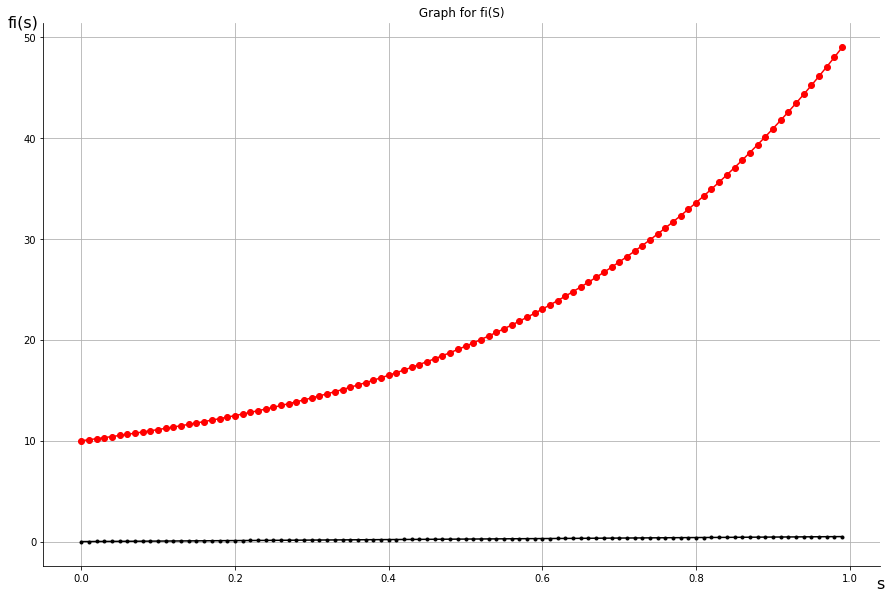

In [ ]:
#graph results


my_fig_size = 10
fig = plt.figure(figsize=(my_fig_size+5,my_fig_size))

ax=fig.add_subplot(111)

#set title
ax.set_title(' Graph for fi(S) ')

# Set common labels
fig.text(0.9, 0.1, 's', ha='center', va='center',fontsize=16)
fig.text(0.106, 0.88, 'fi(s)', ha='center', va='center',fontsize=16)

s_args = np.arange(0,1,0.01)
s_value = build_s_values_array(s_args)

s_original_value = build_s_original_values_array(s_args)

plt.plot(s_args,s_value, marker="o",color = "r")
plt.plot(s_args,s_original_value, marker=".",color = "k")
plt.grid()



# ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
# ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# GRADIENT METHODS


1) Calculate derivate W'(point)

In [ ]:
#returns np.array(size = num_of_vars)
def getFunctionalDerivate(h_t_method_1_array,x0,x1,x2):
  num_of_vars = 3
  step = 0.25
  ret_array = np.zeros(num_of_vars)

  # print("++++++BEGIN++++++")
  

  ordinary_W =  calculate_W(T,h_t_method_1_array,x0,x1,x2)
  # print(ordinary_W)

  matrix = np.zeros((N_x + 1,N_t + 1))
  matrix = compute_matrix_method_1(matrix,    x0+step,x1,x2)
  h_t_method_1_new = get_h_t_method_1(matrix,  x0+step,x1,x2)

  ret_array[0] = (calculate_W(T,h_t_method_1_new,x0 + step,x1,x2) - ordinary_W ) / step
  # print(calculate_W(T,h_t_method_1_new,x0 + step,x1,x2))


  matrix = np.zeros((N_x + 1,N_t + 1))
  matrix = compute_matrix_method_1(matrix,    x0,x1+step,x2)
  h_t_method_1_new = get_h_t_method_1(matrix,  x0,x1+step,x2)
  ret_array[1] = (calculate_W(T,h_t_method_1_new,x0 ,x1 + step,x2) - ordinary_W) / step
  # print(calculate_W(T,h_t_method_1_new,x0 ,x1 + step,x2))


  matrix = np.zeros((N_x + 1,N_t + 1))
  matrix = compute_matrix_method_1(matrix,    x0,x1,x2+step)
  h_t_method_1_new = get_h_t_method_1(matrix,  x0,x1,x2+step)
  ret_array[2] = (calculate_W(T,h_t_method_1_new,x0 ,x1,x2 + step) - ordinary_W) / step
  # print(calculate_W(T,h_t_method_1_new,x0 ,x1,x2 + step))
  
  # print("======END========")

  return ret_array

2) Get x^next array

In [ ]:
#returns np.array(size = num_of_vars)
def getX_NextArray(alpha, x_prev, f_derivate_array):

  # print("f_derivate_array = "+str(f_derivate_array))
  
  num_of_vars = len(f_derivate_array)

  if (len(x_prev) != num_of_vars):
    raise ValueError("x_prev must have same size as f_derivate_array")
  
  ret_array = np.zeros(num_of_vars)
  for i in range(num_of_vars):
    ret_array[i] = x_prev[i] - alpha * f_derivate_array[i]
  
  return ret_array


In [ ]:
print(np.arange(0,15+0.5,0.5))

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5 15. ]


3) Calculate alpha

In [ ]:
def calculateAlpha(x_prev, h_t_method_1_array):

  retAlpha = 0

  if (len(x_prev)!=3):
    raise ValueError("x_next supposed to have length = 3 in these fragment")
  
  x_0=x_prev[0]
  x_1=x_prev[1]
  x_2=x_prev[2]

  alpha_possible_values = np.arange(0.05,1.5,0.15)


  minValue = 9223372036854775

  for possibleAlpha in alpha_possible_values: 
    x_next = getX_NextArray(possibleAlpha,x_prev,getFunctionalDerivate(h_t_method_1_array,x_0,x_1,x_2))
    # print("x_next in calculateAlpha = " + str (x_next))
    x_0_new=x_next[0]
    x_1_new=x_next[1]
    x_2_new=x_next[2]
    curFunctional = calculate_W(T,h_t_method_1_array,x_0_new,x_1_new,x_2_new)
    # print("curFunctional = " + str( curFunctional))
    if ( curFunctional < minValue):
      print("possible alpha = " + str(possibleAlpha))
      minValue = curFunctional
      retAlpha = possibleAlpha
    
  return retAlpha

4) Calculating norma

In [ ]:
def calculateNorma(x_next, h_t_method_1_array):
  x0=x_next[0]
  x1=x_next[1]
  x2=x_next[2]
  derivates = getFunctionalDerivate(h_t_method_1_array,x0,x1,x2)
  ans = 0
  for derivate in derivates:
    ans+= (derivate ** 2)
  ans = math.sqrt(ans)

  return ans

5) Iterating

In [ ]:
x_prev = np.array([0,0,0])
eps = 0.05
cntIterations = 0

while True:
  cntIterations+=1

  fi_0 = x_prev[0]
  fi_1 = x_prev[1]
  fi_2 = x_prev[2]
  matrix = np.zeros((N_x + 1,N_t + 1))
  matrix = compute_matrix_method_1(matrix,    fi_0,fi_1,fi_2)
  h_t_method_1_array = get_h_t_method_1(matrix,  fi_0,fi_1,fi_2)
  print("h_t_method_1_array = " + repr(h_t_method_1_array))
  alpha_1 = calculateAlpha(x_prev,h_t_method_1_array)
  print("alpha_1 = " + str (alpha_1) )
  x_next = getX_NextArray(alpha_1,x_prev,getFunctionalDerivate(h_t_method_1_array,fi_0,fi_1,fi_2))
  print("x_next = " + str (x_next))

  norma = calculateNorma(x_next,h_t_method_1_array)
  print("iteration: " + str (cntIterations))
  print("norma = " + str (norma))
  if ( norma < eps):
    break
  
  x_prev = x_next
  
print("Answer")
print(x_next)


h_t_method_1_array = array([0.01745241, 0.057     , 0.097     , 0.137     , 0.177     , 0.217     , 0.256     , 0.296     , 0.336     , 0.376     , 0.416     , 0.456     , 0.495     , 0.535     , 0.575     , 0.615     , 0.655     , 0.694     , 0.734     , 0.774     , 0.814     , 0.854     , 0.894     , 0.933     , 0.973     , 1.013     , 1.053     , 1.093     , 1.133     , 1.172     , 1.212     , 1.252     , 1.292     , 1.332     , 1.372     , 1.411     , 1.451     , 1.491     , 1.531     , 1.571     , 1.61      , 1.65      , 1.69      , 1.73      , 1.77      , 1.81      , 1.849     , 1.889     , 1.929     , 1.969     , 2.009     , 2.049     , 2.088     , 2.128     , 2.168     , 2.208     , 2.248     , 2.288     , 2.327     , 2.367     , 2.407     , 2.447     , 2.487     , 2.526     , 2.566     , 2.606     , 2.646     , 2.686     , 2.726     , 2.765     , 2.805     , 2.845     , 2.885     , 2.925     , 2.965     , 3.004     , 3.044     , 3.084     , 3.124     , 3.164     , 3.203     , 

# Graphs for compring gradient results with original

In [ ]:
#function for getting array of fi values from given array of arguments
def build_fi_values_from_args(args):
  ret_value_array = np.zeros(len(args))
  if (controller == 1):
    !cp "drive/My Drive/Science_res/base/Fiu.py" .
    import Fiu
  if (controller == 2):
    !cp "drive/My Drive/Science_res/trigonometric/Fiu.py" .
    import Fiu
  if (controller == 3):
    !cp "drive/My Drive/Science_res/degreeFunctions/Fiu.py" .
    import Fiu
  
  fi_u = Fiu.Fi_t()
  for i in range(len(args)):
    ret_value_array[i] = fi_u.compute(args[i])
  
  return ret_value_array

In [ ]:
#compute fi values from computed gradiend coefficients
def build_computed_fi_values_from_args(args, fi_0, fi_1, fi_2):
  ret_value_array = np.zeros(len(args))

  for i in range(len(args)):
    ret_value_array[i] = calculateFi(args[i],   fi_0, fi_1, fi_2)

  return ret_value_array
  

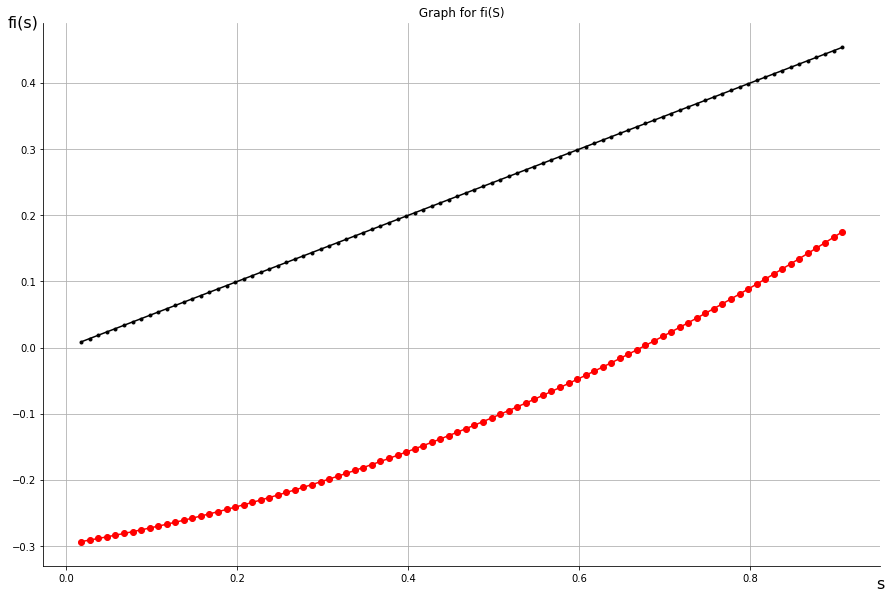

In [ ]:
#graph results


my_fig_size = 10
fig = plt.figure(figsize=(my_fig_size+5,my_fig_size))

ax=fig.add_subplot(111)

#set title
ax.set_title(' Graph for fi(S) ')

# Set common labels
fig.text(0.9, 0.1, 's', ha='center', va='center',fontsize=16)
fig.text(0.106, 0.88, 'fi(s)', ha='center', va='center',fontsize=16)

min_h = np.amin(DESCRETE_values_h_t_func)
max_h = np.amax(DESCRETE_values_h_t_func)

s_args = np.arange(min_h, max_h, 0.01)


f_0 = x_next[0]
f_1 = x_next[1]
f_2 = x_next[2]


s_value = build_computed_fi_values_from_args(s_args, fi_0, fi_1, fi_2)

s_original_value = build_fi_values_from_args(s_args)

# ax.set_xlim([0,2])
# ax.set_ylim([0,1])

plt.plot(s_args,s_value, marker="o",color = "r")
plt.plot(s_args,s_original_value, marker=".",color = "k")
plt.grid()



# ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
# ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')